In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/linkedin-reviews.csv')
df


,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4
...,...,...
697,"Can't trust, Going to uninstall just for that ...",1
698,It really gets me linked in with my friends. H...,5
699,It lacks most of what makes the other social n...,4
700,Really disappointed in the new version. Seems ...,2


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

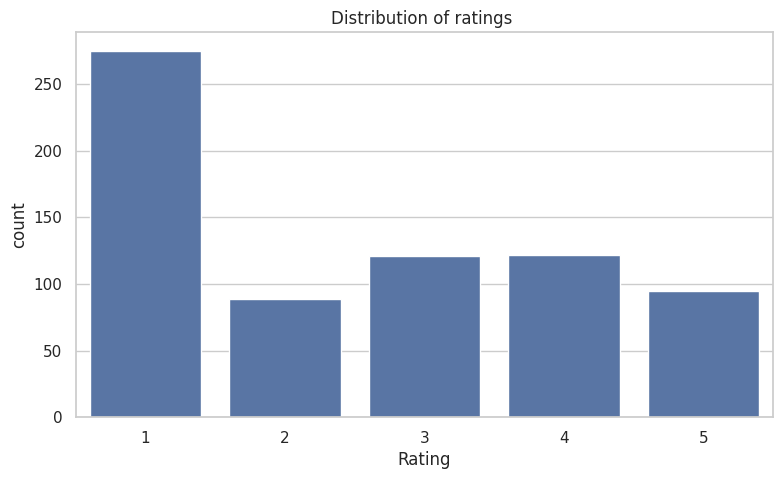

In [6]:
sns.set(style = 'whitegrid')
plt.figure(figsize = (9,5))
sns.countplot(data = df , x = 'Rating')
plt.title('Distribution of ratings ')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()

In [7]:
!pip install textblob

In [8]:
from textblob import TextBlob

In [14]:
def textblob_sentiment_analysis(review):
  sentiment = TextBlob(review)
  if sentiment.polarity > 0.1:
    return 'Positive'
  elif sentiment.polarity < -0.1:
    return 'Negative'
  else:
    return 'Neutral'

In [15]:
df['Sentiment'] = df['Review'].apply(textblob_sentiment_analysis)

In [16]:
df.sample(5)

,Review,Rating,Sentiment
244,Very limited app. Can't view forum posts. UNIS...,1,Neutral
296,Doesn't work at all and very slow,3,Negative
597,Like the UI and etc. But it is draining my bat...,3,Neutral
442,junk,1,Neutral
460,Very handy..works great droid x,5,Positive


In [17]:
sentiment_distribution = df['Sentiment'].value_counts()
sentiment_distribution

,count
Sentiment,
Neutral,300
Positive,295
Negative,107


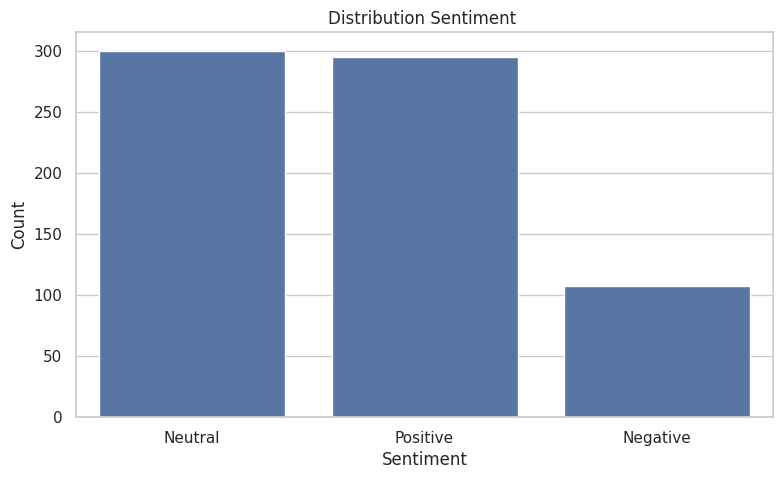

In [18]:
plt.figure(figsize = (9,5))
sns.barplot(x = sentiment_distribution.index , y = sentiment_distribution.values)
plt.title('Distribution Sentiment ')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

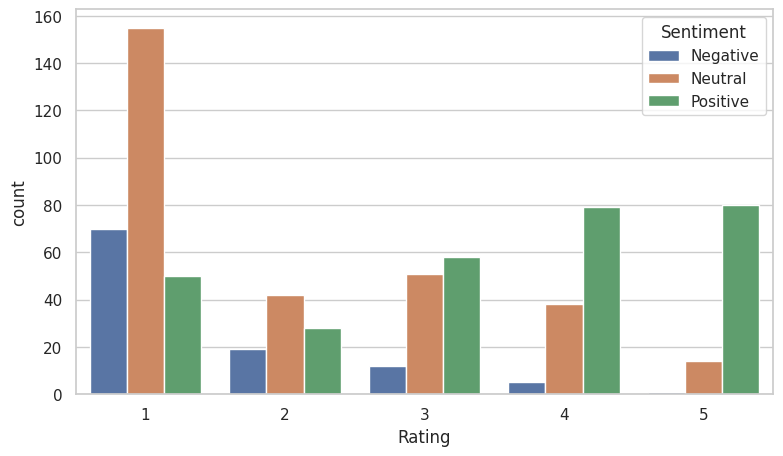

In [21]:
plt.figure(figsize = (9,5))
sns.countplot(data = df , x = 'Rating' , hue = 'Sentiment')
plt.xlabel('Rating')
plt.ylabel('count')
plt.legend(title = 'Sentiment')
plt.show()